# IMAGE NORMALIZATION

In [ ]:
## Importing Required/Necessary Images

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

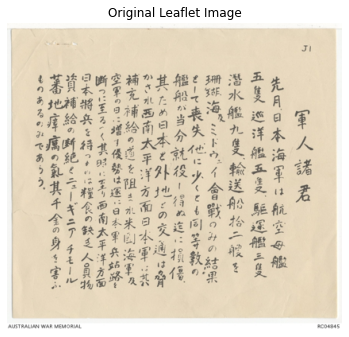

In [6]:
# Read image from file
image = cv2.imread("images/Group_1/J1.png")

# Convert BGR (OpenCV format) to RGB (matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(6,6))
plt.imshow(image_rgb)
plt.title("Original Leaflet Image")
plt.axis("off")
plt.show()